In [1]:
#To read everything corrected so it can be read in Panda
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
observations_df = pd.read_csv(r'mushrom_observations.csv', delimiter = ';')
observations_df.head()
characteristics_df = pd.read_csv(r'mushroom_characteristics.csv', delimiter = ';')
characteristics_df.head()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"


In [2]:
#Basic inspections
observations_df.info()
characteristics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
# Separate columns by type, remove duplicates using set
categorical_cols = list(set(
    observations_df.select_dtypes(include='object').columns.tolist() +
    characteristics_df.select_dtypes(include='object').columns.tolist()
))

numerical_cols = list(set(
    observations_df.select_dtypes(include='float64').columns.tolist() +
    characteristics_df.select_dtypes(include='float64').columns.tolist()
))

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)

Categorical: ['stem-color', 'stem-surface', 'class', 'Spore-print-color', 'cap-diameter', 'spore-print-color', 'cap-shape', 'veil-type', 'cap-color', 'does-bruise-or-bleed', 'stem-width', 'gill-spacing', 'habitat', 'name', 'season', 'cap-surface', 'ring-type', 'has-ring', 'stem-root', 'veil-color', 'family', 'gill-color', 'Cap-surface', 'gill-attachment', 'stem-height']
Numerical: ['cap-diameter', 'stem-width', 'stem-height']


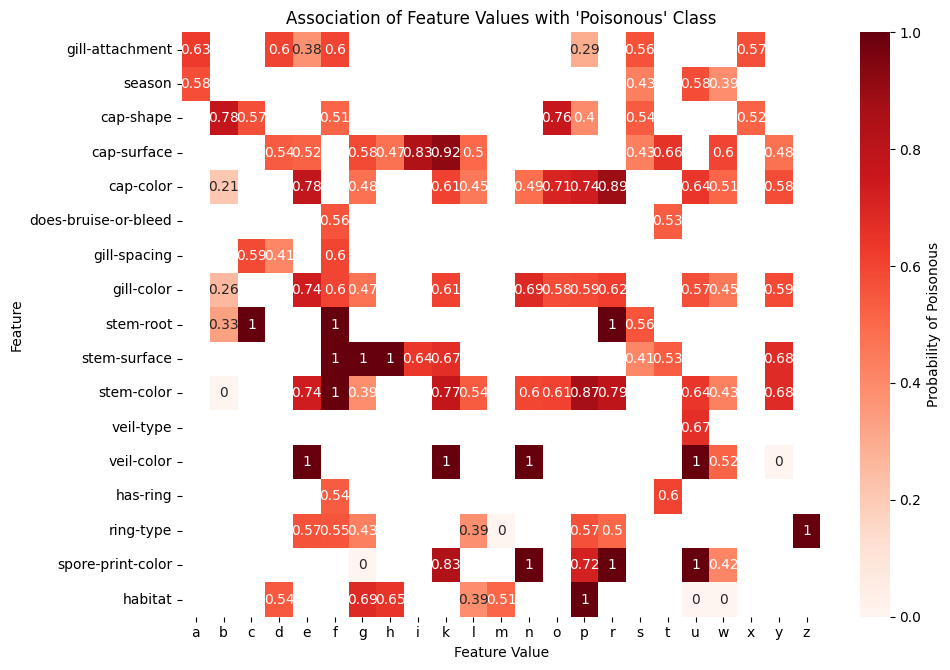

In [5]:
# Define target and categorical features
target = 'class'
categorical_cols = observations_df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove(target)  # exclude class from analysis

# Store top values associated with poisonous
poisonous_matrix = {}

for col in categorical_cols:
    # Crosstab with row-wise normalization
    ct = pd.crosstab(observations_df[col], observations_df[target], normalize='index')

    # Only keep poisonous column
    if 'p' in ct.columns:
        poisonous_matrix[col] = ct['p']

# Combine all into a DataFrame
poisonous_df = pd.DataFrame(poisonous_matrix).T  # transpose so features are rows

# Sort by max poisonous association
poisonous_df = poisonous_df.sort_values(by=poisonous_df.columns[0], ascending=False)

# Plot as heatmap
plt.figure(figsize=(10, len(poisonous_df) * 0.4))
sns.heatmap(poisonous_df, annot=True, cmap="Reds", cbar_kws={'label': 'Probability of Poisonous'})
plt.title("Association of Feature Values with 'Poisonous' Class")
plt.xlabel("Feature Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()